<a href="https://colab.research.google.com/github/MAHATWAKANSHI/CODEE/blob/main/RAM_MANDIR_SENTIMENTAL_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***IMPORTING LIBRARIES***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from wordcloud import WordCloud
import matplotlib.image as mpimg

***DOWLOAD OF THE PACKAGES***

In [ ]:
plt.style.use("ggplot")
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

***READING OF  THE FILE***


In [ ]:
read_excel = pd.read_excel("/content/Book1.xlsx")
print("Shape of the excel file is:",read_excel.shape)
print("\nPreview of the excel file.")
read_excel.head()

Shape of the excel file is: (20608, 2)

Preview of the excel file.


,ID,Reviews
0,1,CM Yogi Jis poignant reflections on the histor...
1,2,Mesmerizing lights illuminate Ayodhya as the d...
2,3,PM Modis 11day fasting journey in devotion to ...
3,4,The sacred name of Shree Ram reverberates acro...
4,5,Basking in the divine glow of Lord Shree Ram J...


***SENTIMENTAL ANALYSING USING VADER***

In [ ]:
review  = read_excel["Reviews"][10]
print(review)
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(review)

Celebrating a historic day as the Ram Mandir inauguration fills our hearts with joy and unity Jai Shree Ram Embracing the divine aura in Ayodhya as devotees and leaders


{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.9118}

***APPLYING VADERS ON THE WHOLE EXCEL FILE***

In [ ]:
result = {}
for i, row in tqdm(read_excel.iterrows(), total=len(read_excel)):
  text = row['Reviews']
  myid = row['ID']

  #handles mishandled data
  if pd.isna(text) or not isinstance(text, str):
    scores = {}
  else:
    scores = sia.polarity_scores(text)
    result[myid] = scores

  0%|          | 0/20608 [00:00<?, ?it/s]

***MERGING AND PREVIEW OF THE FILE AFTER APPLYING VADERS***

In [ ]:
vaders = pd.DataFrame(result.values(), index=result.keys())
vaders= vaders.reset_index().rename(columns={"index": 'ID'})
vaders = vaders.merge(read_excel, on="ID", how="right")
print("PREVIEW OF THE FILE AFTER APPLYING VADERS")
vaders.head()

PREVIEW OF THE FILE AFTER APPLYING VADERS


,ID,neg,neu,pos,compound,Reviews
0,1,0.0,0.768,0.232,0.8860,CM Yogi Jis poignant reflections on the histor...
1,2,0.0,0.660,0.340,0.9744,Mesmerizing lights illuminate Ayodhya as the d...
2,3,0.0,0.858,0.142,0.6486,PM Modis 11day fasting journey in devotion to ...
3,4,0.0,0.712,0.288,0.8720,The sacred name of Shree Ram reverberates acro...
4,5,0.0,0.704,0.296,0.8779,Basking in the divine glow of Lord Shree Ram J...


***FREQUENCY DISTRIBUTION OF THE COMPOUND SCORES***

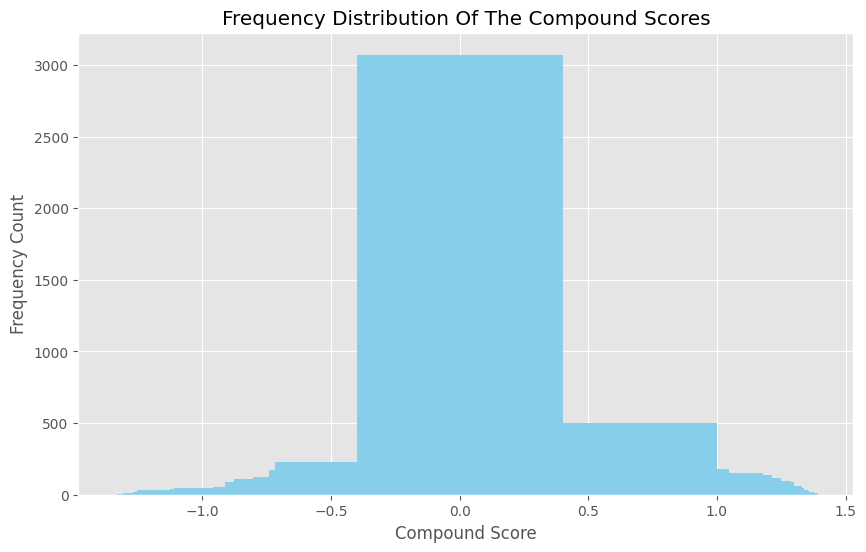

In [ ]:
compound_counts = {}
for score in vaders['compound']:
  if score in compound_counts:
    compound_counts[score] += 1
  else:
    compound_counts[score] = 1

plt.figure(figsize=(10, 6))
plt.bar(compound_counts.keys(), compound_counts.values(), color='skyblue')
plt.xlabel('Compound Score')
plt.ylabel('Frequency Count')
plt.title('Frequency Distribution Of The Compound Scores')
plt.show()

***PICTORIAL REPRESENTATION OF THE VADER OUTPUT***

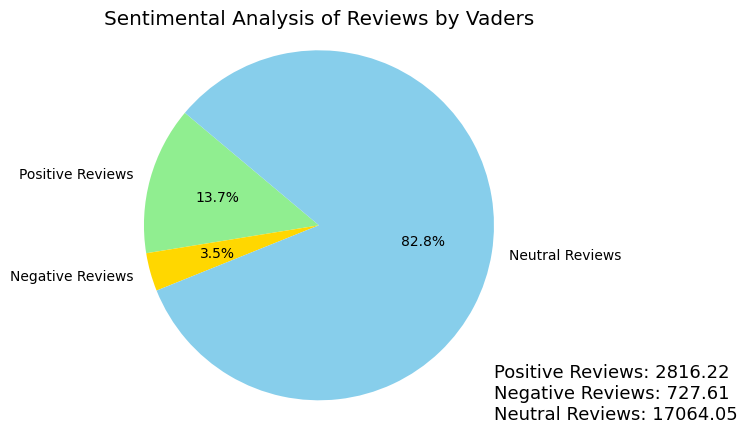

In [ ]:
pos_total = sum(vaders['pos'])
neg_total = sum(vaders['neg'])
neu_total = sum(vaders['neu'])

total_reviews = pos_total + neg_total + neu_total
pos_percentage = (pos_total / total_reviews) * 100
neg_percentage = (neg_total / total_reviews) * 100
neu_percentage = (neu_total / total_reviews) * 100

labels = ['Positive Reviews', 'Negative Reviews', 'Neutral Reviews']
sizes = [pos_percentage, neg_percentage, neu_percentage]
colors = ['lightgreen', 'gold', 'skyblue']

plt.figure(figsize=(7, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
total_reviews = sum(sizes)
for i, (label, size) in enumerate(zip(labels, sizes)):
  percentage = (size / total_reviews) * 100

pos_total_formatted = '{:.2f}'.format(pos_total)
neg_total_formatted = '{:.2f}'.format(neg_total)
neu_total_formatted = '{:.2f}'.format(neu_total)

total_text = f'\nPositive Reviews: {pos_total_formatted} \nNegative Reviews: {neg_total_formatted} \nNeutral Reviews: {neu_total_formatted}'
plt.text(1, -0.9, total_text, fontsize=13, verticalalignment='center')

plt.title('Sentimental Analysis of Reviews by Vaders')
plt.axis('equal')
plt.show()

***IMPORTING ROBERTA MODEL***

In [ ]:
from transformers import AutoModelForSequenceClassification, pipeline
from transformers import TFAutoModelForSequenceClassification, AutoConfig
from scipy.special import softmax
from transformers import AutoTokenizer

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


***SENTIMENTAL ANALYSIS USING ROBERTA MODEL***

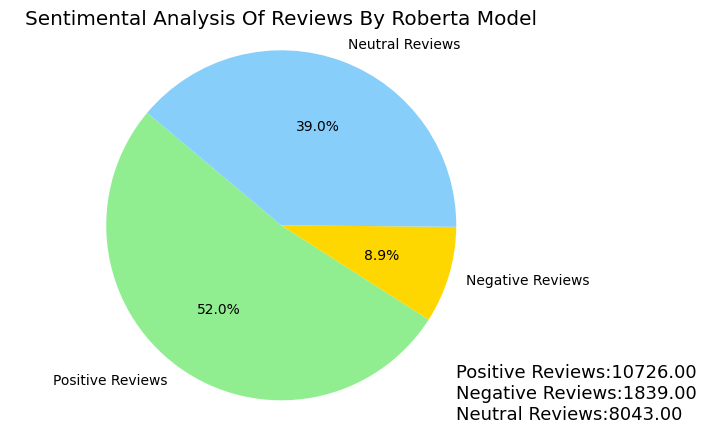

In [ ]:
def polarity_scores_roberta(review):
  encoded_text = tokenizer(review, return_tensors="pt")
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
    "roberta_neg" : scores[0],
    "roberta_pos" : scores[1],
    "roberta_neu" : scores[2]
  }
  return scores_dict

reviews = read_excel["Reviews"]
all_scores = reviews.apply(polarity_scores_roberta)
all_scores_df = pd.DataFrame(all_scores.tolist())

pos_scores = all_scores_df['roberta_pos']
neg_scores = all_scores_df['roberta_neg']

# Calculate sentiment counts
pos_count = np.sum(pos_scores > 0.5)
neg_count = np.sum(neg_scores > 0.5)
neu_count = len(all_scores_df) - pos_count - neg_count

total_reviews = len(all_scores_df)
pos_percentage = (pos_count / total_reviews) * 100
neg_percentage = (neg_count / total_reviews) * 100
neu_percentage = (neu_count / total_reviews) * 100

labels = ['Positive Reviews', 'Negative Reviews', 'Neutral Reviews']
sizes = [pos_percentage, neg_percentage, neu_percentage]
colors = ['lightgreen', 'gold', 'lightskyblue']

plt.figure(figsize=(7, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

pos_total_formatted = '{:.2f}'.format(pos_count)
neg_total_formatted = '{:.2f}'.format(neg_count)
neu_total_formatted = '{:.2f}'.format(neu_count)

total_text = f'\nPositive Reviews:{pos_total_formatted} \nNegative Reviews:{neg_total_formatted} \nNeutral Reviews:{neu_total_formatted}'
plt.text(1, -0.9, total_text, fontsize=13, verticalalignment='center')

plt.title('Sentimental Analysis Of Reviews By Roberta Model')
plt.axis('equal')
plt.show()

***MERGING OF BOTH THE RESULTS UNDER ONE DATAFRAME***

In [ ]:
results_df = pd.DataFrame(result).T
results_df = results_df.reset_index().rename(columns={'index': 'ID'})

# Merge the Vader and Roberta results
merged_df = pd.merge(read_excel, results_df, how='left',suffixes=('_read_excel', '_results'))
merged_df.head()

***COMPARISION BETWEEN THE MODELS USED IN SENTIMENTAL ANALYSIS***

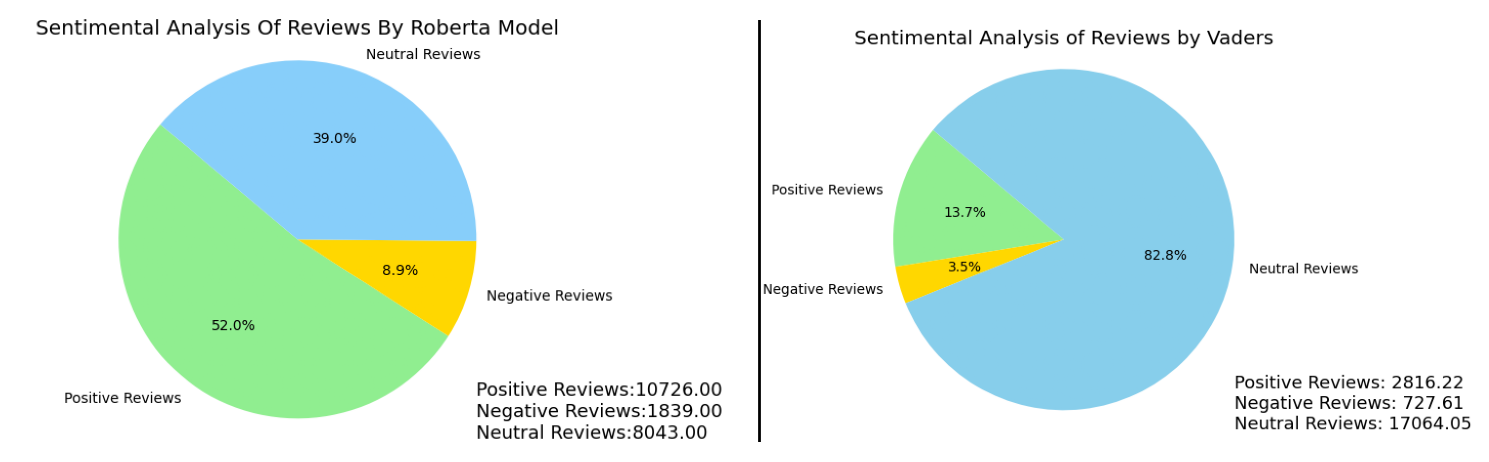

In [ ]:
image1 = mpimg.imread('/content/roberta.png')
image2 = mpimg.imread('/content/vader.png')

#plotting the graphs
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,15))

ax1.imshow(image1)
ax1.axis("off")

plt.axvline(x=6, color='black', linestyle='-', linewidth=2)

ax2.imshow(image2)
ax2.axis('off')

plt.tight_layout()
plt.show()

***WORD CLOUD***

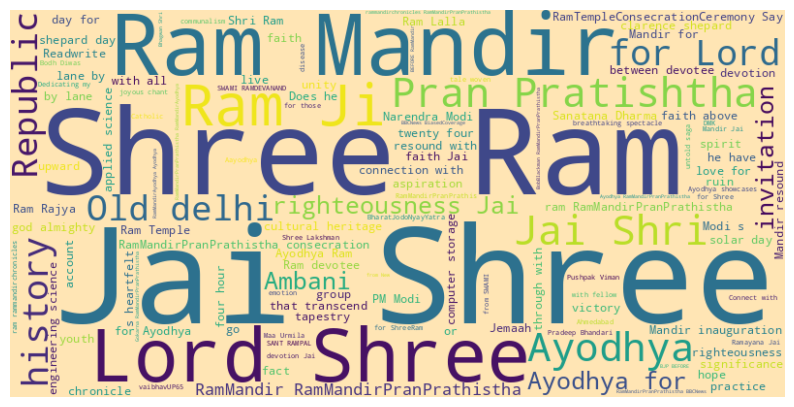

In [ ]:
data = pd.read_csv("/content/Book1.csv")

text = ' '.join(data['Reviews'].astype(str))
stopwords = ["random","Aries","access","memory","mosque","as","after","the","and","of","Jemmah","islamiyah","Arvind", "Kejriwal","Read","write","atomic","number","information","technology","health","organization","world","a","Tup","Islamic","BBC","This","is","make","up","alliance","their","our","his","in","at","to","every","mujahidin","they","we","militant","street","unemployed","across","on","see","along","chai","wala"]

wordcloud = WordCloud(width=800, height=400, background_color='#FFE5B4', stopwords=stopwords).generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# ***CONCLUSION***

**VADER MODEL RESULTS**
1. Positive Reviews: 2816.22 (13.7%)
2. Negative Reviews: 727.61 (3.5%)
3. Neutral Reviews: 17064.05 (82.8%)


**ROBERTA MODEL RESULTS**
1.   Positive Reviews: 10726.00 (52.0%)
2.   Negative Reviews: 1839.00 (8.9%)
3.   Neutral Reviews: 8043.00 (39.0%)


From these results, we can see that the two models have different interpretations of the same data. The VADER model classified a larger proportion of the reviews as Neutral, while the RoBERTa model classified a larger proportion as Positive.

However, it’s important to note that while ROBERTA may provide more accurate results for some datasets, it’s also more computationally intensive than VADER. Therefore, the choice between VADER and ROBERTA may depend on your specific needs, including the size and nature of your dataset, and the computational resources available.

In conclusion, both VADER and ROBERTA have their strengths and can be effective tools for sentiment analysis, but the best choice depends on the specific use case.

***BELOW ARE THE ADDITIONAL CODES WHICH WE USED FOR OUR PROJECT***

***CODE USED FOR AUGMENTATION***

In [ ]:
import nlpaug.augmenter.word as naw
from nlpaug.util import Action

df = pd.read_excel('Augmented_Dataset60.xlsx')
aug = naw.SynonymAug(aug_src='wordnet')

augmented_texts = []
for index, row in df.iterrows():
  text = row['Reviews']
  augmented_text = aug.augment(text)
  augmented_texts.append(augmented_text)

df['Augmented text'] = augmented_texts

df.to_excel('Augmented_Dataset7.xlsx', index=False)

***CODE USED TO FIND DUPLICATE LINES IN THE DATASET***

In [ ]:
import pandas as pd

def remove_duplicates_excel(input_file, output_file):
  df = pd.read_excel(input_file)
  duplicates = df[df.duplicated(df.columns[1])]
  df = df.drop_duplicates(df.columns[1], keep='first')
  df.to_excel(output_file, index=False)
  return len(duplicates)

if __name__ == "__main__":
    input_file = "/kaggle/input/dataset13/Augmented_Dataset6.xlsx"
    output_file = "/kaggle/working/output.xlsx"

    num_duplicates_removed = remove_duplicates_excel(input_file, output_file)
    print(f"Removed {num_duplicates_removed} duplicate(s) from the second column.")

***CODE USED FOR CLEANING AFTER AUGMENTATION***

In [ ]:
import pandas as pd
import re

def clean_data(data):
  data = re.sub(r'\[|\]', '', data)
  data = re.sub(r'[^\w\s]', '', data)
  data = re.sub(r'\s+', ' ', data)
  return data.strip()

def clean_excel(file_name, output_file='cleaned_data.xlsx', sheet_name='Sheet1'):
  df = pd.read_excel(file_name, sheet_name=sheet_name)
  df_cleaned = df.applymap(lambda x: clean_data(str(x)))
  df_cleaned.to_excel(output_file, index=False)
  print("Cleaned dataset saved as:", output_file)

***CODE USED FOR TRANSLATION TO ENGLISH FROM ANY OTHER LANGUAGE***

In [ ]:
import csv
from googletrans import Translator

def translate_to_english(input_file, output_file):
    translator = Translator()
    with open(input_file, 'r', encoding='utf-8') as csvfile:
        reader = csv.reader("output.csv")
        with open("output1.csv", 'w', newline='', encoding='utf-8') as outfile:
            writer = csv.writer(outfile)
            for row in reader:
                translated_row = []
                for cell in row:
                    translated_text = translator.translate(cell, dest='en').text
                    translated_row.append(translated_text)
                writer.writerow(translated_row)

if __name__ == "__main__":
    input_file = 'output.csv'
    output_file = 'output1.csv'
    translate_to_english(input_file, output_file)


***EXTENSION USED TO EXTRACT TWITTERS***

https://chromewebstore.google.com/detail/twextract-export-anyones/pbajmkgfblpcnmbceefnjbhbhkflameh